In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('smiley.csv')  # last 10 points are noise
df.head()

,x,y
0,283,18
1,315,19
2,341,33
3,363,47
4,389,67


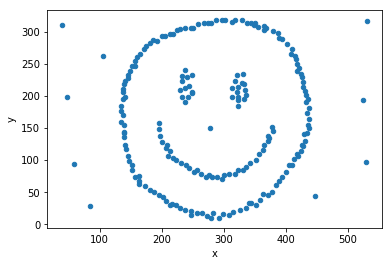

In [3]:
df.plot.scatter(x='x', y='y')

In [14]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=30, min_samples=4)  
dbs.fit(df)
set(dbs.labels_)

{-1, 0, 1, 2, 3}

In [15]:
dbs.labels_  # noisy is -1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  3,  3,
        3,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

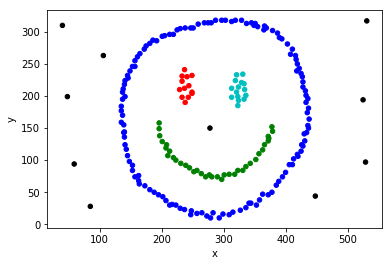

In [16]:
def f(x):  # for data with <= 6 cluster
    if x == -1: return 'k'
    a = ['b', 'g', 'r', 'c', 'm', 'y']
    return a[x]
color = np.vectorize(f)(dbs.labels_)
df.plot.scatter(x='x', y='y', c=color)

# Find epsilon

using k-distance graph

In [9]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4).fit(df)

In [10]:
dist, index = nn.kneighbors(df)
dist

array([[  0.        ,   8.94427191,  11.18033989,  12.80624847],
       [  0.        ,   7.21110255,  12.36931688,  16.2788206 ],
       [  0.        ,   3.        ,   8.60232527,  12.36931688],
       [  0.        ,   9.05538514,  10.29563014,  15.29705854],
       [  0.        ,   7.21110255,   9.21954446,  17.80449381],
       [  0.        ,   5.        ,  11.40175425,  13.41640786],
       [  0.        ,   3.16227766,   7.81024968,   9.21954446],
       [  0.        ,   4.47213595,  11.04536102,  11.40175425],
       [  0.        ,   7.28010989,  10.44030651,  16.1245155 ],
       [  0.        ,   5.83095189,   7.07106781,  11.        ],
       [  0.        ,   5.65685425,   8.06225775,  11.04536102],
       [  0.        ,   8.24621125,   8.54400375,  12.04159458],
       [  0.        ,   4.47213595,  11.40175425,  12.04159458],
       [  0.        ,   5.        ,   6.08276253,  11.18033989],
       [  0.        ,   8.06225775,   9.43398113,  12.36931688],
       [  0.        ,   6

In [11]:
d = dist[:,-1]
d = sorted(d, reverse=True)
d

[129.28263611173776,
 127.81236246936366,
 103.40696301506973,
 92.02716990106781,
 89.08984229416954,
 87.09190547921202,
 86.4060183089118,
 61.40032573203501,
 59.405386961116584,
 49.9799959983992,
 29.427877939124322,
 20.615528128088304,
 19.235384061671343,
 18.681541692269406,
 18.601075237738275,
 18.0,
 17.804493814764857,
 17.804493814764857,
 17.804493814764857,
 17.804493814764857,
 17.46424919657298,
 17.0,
 17.0,
 16.76305461424021,
 16.64331697709324,
 16.64331697709324,
 16.401219466856727,
 16.401219466856727,
 16.401219466856727,
 16.401219466856727,
 16.278820596099706,
 16.278820596099706,
 16.278820596099706,
 16.1245154965971,
 16.1245154965971,
 16.1245154965971,
 16.1245154965971,
 16.1245154965971,
 16.1245154965971,
 16.1245154965971,
 16.1245154965971,
 16.0312195418814,
 16.0,
 16.0,
 15.811388300841896,
 15.811388300841896,
 15.652475842498529,
 15.652475842498529,
 15.556349186104045,
 15.524174696260024,
 15.297058540778355,
 15.297058540778355,
 15.1327

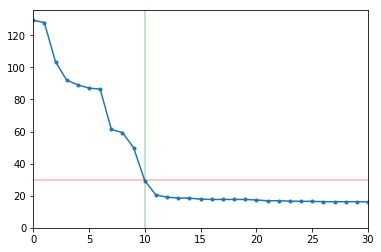

In [12]:
# zoom in
plt.plot(d, marker='.')
plt.xlim(0, 30)
plt.axhline(y=30, alpha=0.3, c='r')
plt.axvline(x=10, alpha=0.3, c='g')

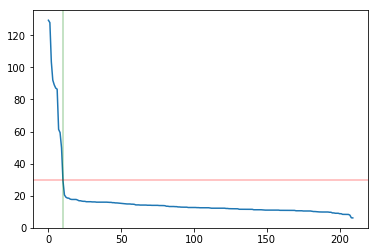

In [13]:
# zoom out
plt.plot(d)
plt.axhline(y=30, alpha=0.3, c='r')
plt.axvline(x=10, alpha=0.3, c='g')